In [2]:
#intalling the necessary package for classification rule
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [5]:
#importing the necessarry libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

In [7]:
#loading the Data
data = pd.read_csv('Market Basket Analysis - Groceries_dataset.csv')

In [9]:
#print afew rows of the data
data.head()


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


the data has 3 columns namely member_number,date and itemDescription


In [6]:
#checking for summary statistics
data.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


We have 38765 rows of data in the member_number column ,5000 being the maximum and 1000 the minimum.

In [7]:
# Converting 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

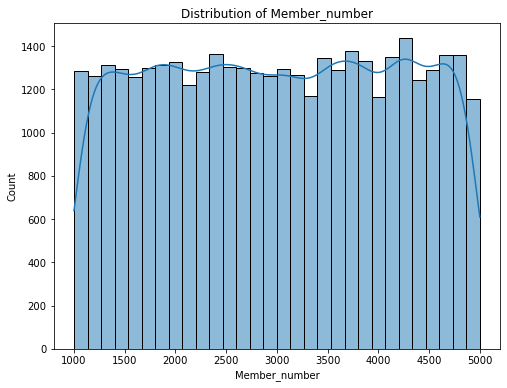

In [8]:
# Distribution of 'Member_number'
plt.figure(figsize=(8, 6))
sns.histplot(data['Member_number'], bins=30, kde=True)
plt.title('Distribution of Member_number')
plt.show()

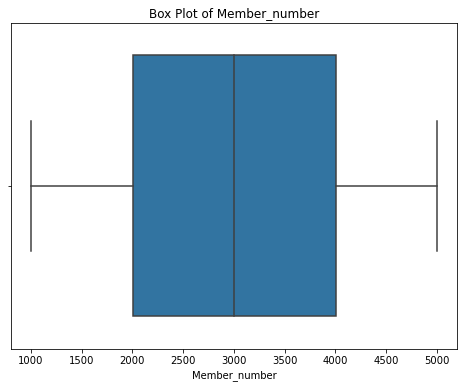

In [9]:
# Box plot for 'Member_number'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Member_number'])
plt.title('Box Plot of Member_number')
plt.show()

In [10]:
# Item frequencies
item_frequencies = data['itemDescription'].value_counts()
print("Item Frequencies:\n", item_frequencies)

Item Frequencies:
 whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64


The data has 167 unique items,whole milk being the frequently purchased item followed by other vegetables while preservation products and kitchen utensils are the least.

In [11]:
# Select the top 20 most frequent items
top_20_items = item_frequencies.head(20)

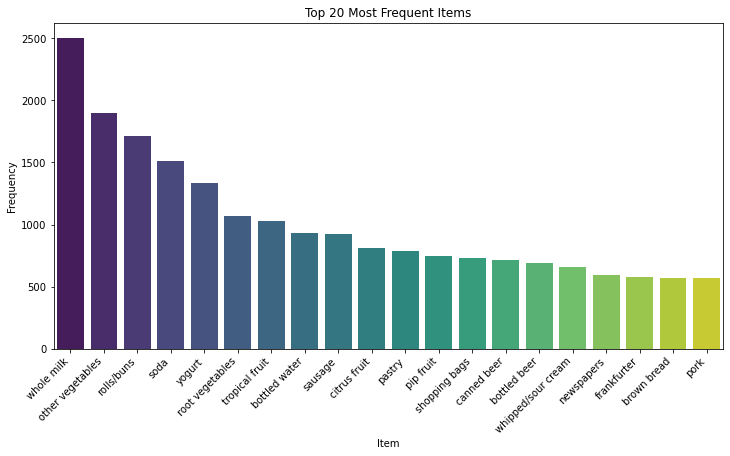

In [12]:
# Plot the top 20 most frequent items
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_items.index, y=top_20_items.values, palette='viridis')
plt.title('Top 20 Most Frequent Items')
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [13]:
# Select the least 20 most frequent items
least_20_items = item_frequencies.tail(20)

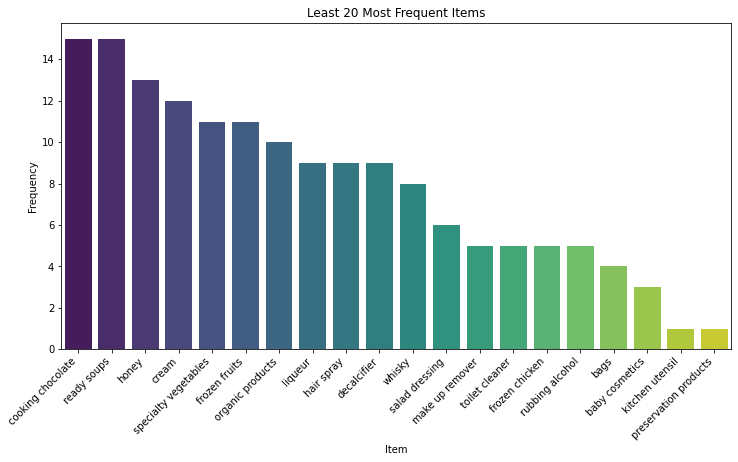

In [14]:
# Plot the least 20 most frequent items
plt.figure(figsize=(12, 6))
sns.barplot(x=least_20_items.index, y=least_20_items.values, palette='viridis')
plt.title('Least 20 Most Frequent Items')
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [15]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder



# Extract the relevant column for transaction encoding
transactions = data['itemDescription'].groupby(data['Member_number']).apply(list).tolist()

# Transaction encoding
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
data_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Display the encoded data
print(data_encoded)


      Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                     False     False             False             False   
1                     False     False             False             False   
2                     False     False             False             False   
3                     False     False             False             False   
4                     False     False             False             False   
...                     ...       ...               ...               ...   
3893                  False     False             False             False   
3894                  False     False             False             False   
3895                  False     False             False             False   
3896                  False     False             False             False   
3897                  False     False             False             False   

      baby cosmetics   bags  baking powder  bathroom cleaner   beef  berrie

In [16]:
# Perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=['itemDescription'], prefix='', prefix_sep='')
print(data_encoded)

       Member_number       Date  Instant food products  UHT-milk  \
0               1808 2015-07-21                      0         0   
1               2552 2015-01-05                      0         0   
2               2300 2015-09-19                      0         0   
3               1187 2015-12-12                      0         0   
4               3037 2015-02-01                      0         0   
...              ...        ...                    ...       ...   
38760           4471 2014-10-08                      0         0   
38761           2022 2014-02-23                      0         0   
38762           1097 2014-04-16                      0         0   
38763           1510 2014-12-03                      0         0   
38764           1521 2014-12-26                      0         0   

       abrasive cleaner  artif. sweetener  baby cosmetics  bags  \
0                     0                 0               0     0   
1                     0                 0        

In [17]:
# Item co-occurrence analysis
item_columns = data_encoded.columns[2:]  # Assuming item columns start from index 2
item_data = data_encoded[item_columns]
item_cooccurrence = item_data.corr()

In [18]:
# Ensure binary values (0 or 1) in the dataframe
data_encoded = data_encoded.applymap(lambda x: 1 if x else 0)
print(data_encoded)

       Member_number  Date  Instant food products  UHT-milk  abrasive cleaner  \
0                  1     1                      0         0                 0   
1                  1     1                      0         0                 0   
2                  1     1                      0         0                 0   
3                  1     1                      0         0                 0   
4                  1     1                      0         0                 0   
...              ...   ...                    ...       ...               ...   
38760              1     1                      0         0                 0   
38761              1     1                      0         0                 0   
38762              1     1                      0         0                 0   
38763              1     1                      0         0                 0   
38764              1     1                      0         0                 0   

       artif. sweetener  ba

In [19]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Assuming you have loaded your data into the 'data' DataFrame

# Extract the relevant column for transaction encoding
transactions = data['itemDescription'].groupby(data['Member_number']).apply(list).tolist()

# Transaction encoding
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
data_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Display the encoded data
print(data_encoded)


      Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                     False     False             False             False   
1                     False     False             False             False   
2                     False     False             False             False   
3                     False     False             False             False   
4                     False     False             False             False   
...                     ...       ...               ...               ...   
3893                  False     False             False             False   
3894                  False     False             False             False   
3895                  False     False             False             False   
3896                  False     False             False             False   
3897                  False     False             False             False   

      baby cosmetics   bags  baking powder  bathroom cleaner   beef  berrie

The resulting dataframe 'data_encoded' contains binary columns for each item and the original column itemdescription has been replaced.Each row corresponds a transaction and the columns represent different items with binary values indicating their absence or presence.

In [20]:
#Association rule mining
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(data_encoded, min_support=0.01, use_colnames=True)
print(frequent_itemsets)


       support                                           itemsets
0     0.015393                            (Instant food products)
1     0.078502                                         (UHT-milk)
2     0.031042                                    (baking powder)
3     0.119548                                             (beef)
4     0.079785                                          (berries)
...        ...                                                ...
3011  0.011031     (whipped/sour cream, yogurt, whole milk, soda)
3012  0.010518  (other vegetables, yogurt, bottled water, roll...
3013  0.013597  (other vegetables, yogurt, sausage, rolls/buns...
3014  0.010005  (other vegetables, yogurt, shopping bags, roll...
3015  0.013597  (other vegetables, yogurt, whole milk, rolls/b...

[3016 rows x 2 columns]


Instant food products has the highest support of 1.54%

In [43]:
from mlxtend.frequent_patterns import association_rules

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the generated rules
print(rules)


              antecedents                                        consequents  \
0                  (beef)                                         (UHT-milk)   
1              (UHT-milk)                                             (beef)   
2          (bottled beer)                                         (UHT-milk)   
3              (UHT-milk)                                     (bottled beer)   
4              (UHT-milk)                                    (bottled water)   
...                   ...                                                ...   
15255  (other vegetables)             (rolls/buns, yogurt, soda, whole milk)   
15256            (yogurt)   (rolls/buns, soda, other vegetables, whole milk)   
15257        (whole milk)       (rolls/buns, yogurt, other vegetables, soda)   
15258        (rolls/buns)       (yogurt, soda, other vegetables, whole milk)   
15259              (soda)  (rolls/buns, yogurt, other vegetables, whole m...   

       antecedent support  consequent s

In [45]:
high_confidence_lift_rules = rules[(rules['confidence'] > 0.5) & (rules['lift'] > 1.2)]
print(high_confidence_lift_rules)


                                             antecedents         consequents  \
696                                  (canned vegetables)        (whole milk)   
698                                           (cat food)  (other vegetables)   
710                                           (cat food)        (whole milk)   
731                                        (chewing gum)        (whole milk)   
822                                          (chocolate)        (whole milk)   
...                                                  ...                 ...   
15200  (rolls/buns, yogurt, other vegetables, shoppin...        (whole milk)   
15201  (yogurt, other vegetables, whole milk, shoppin...        (rolls/buns)   
15204    (rolls/buns, yogurt, whole milk, shopping bags)  (other vegetables)   
15232       (rolls/buns, yogurt, other vegetables, soda)        (whole milk)   
15234             (rolls/buns, yogurt, soda, whole milk)  (other vegetables)   

       antecedent support  consequent s

/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


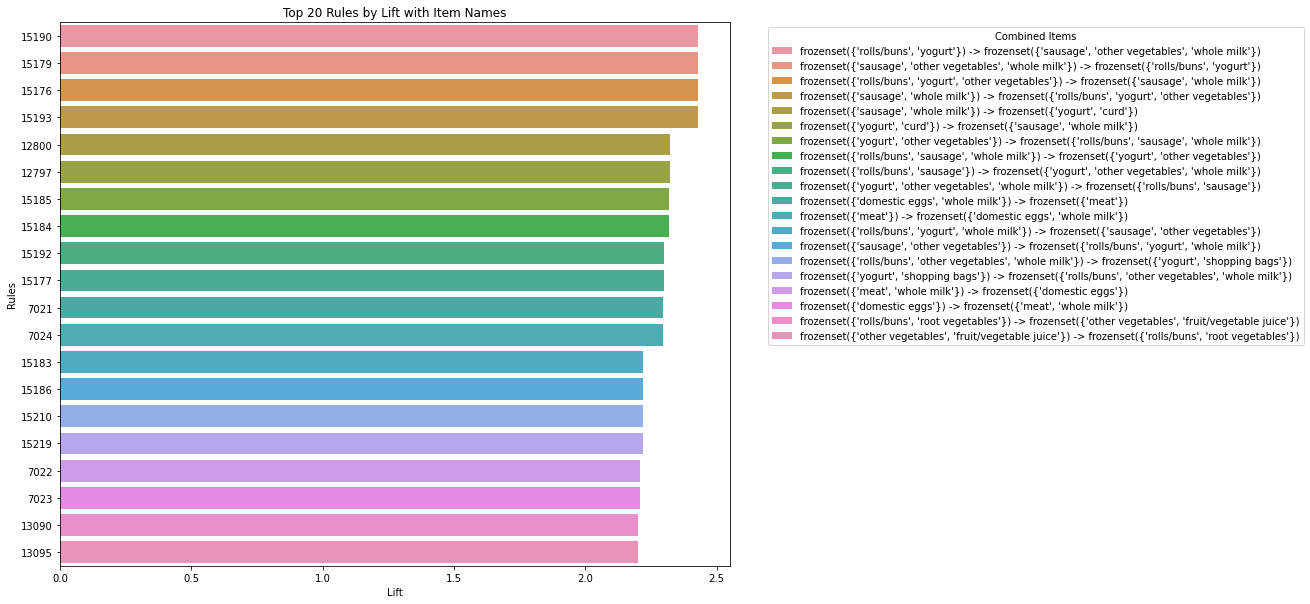

In [49]:
# Sorting rules by lift in descending order
top_20_lift_rules = rules.sort_values(by='lift', ascending=False).head(20)

# Combine antecedents and consequents for better readability
top_20_lift_rules['combined_items'] = top_20_lift_rules['antecedents'].astype(str) + ' -> ' + top_20_lift_rules['consequents'].astype(str)

# Plotting the top 20 rules with item names
plt.figure(figsize=(12, 10))
sns.barplot(x='lift', y=top_20_lift_rules.index.astype(str), hue='combined_items', data=top_20_lift_rules, dodge=False)
plt.title('Top 20 Rules by Lift with Item Names')
plt.xlabel('Lift')
plt.ylabel('Rules')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Combined Items')
plt.show()


In [51]:
# Set a threshold for lift to consider
lift_threshold = 1.5

# Filter rules with lift above the threshold
high_lift_rules = rules[rules['lift'] > lift_threshold]

# Combine antecedents and consequents for better readability
high_lift_rules['combined_items'] = high_lift_rules['antecedents'].astype(str) + ' -> ' + high_lift_rules['consequents'].astype(str)

# Display the items that should be placed side by side
print("Items that should be placed side by side:")
for combined_items in high_lift_rules['combined_items']:
    print(combined_items)


Items that should be placed side by side:
frozenset({'UHT-milk'}) -> frozenset({'cream cheese '})
frozenset({'cream cheese '}) -> frozenset({'UHT-milk'})
frozenset({'berries'}) -> frozenset({'fruit/vegetable juice'})
frozenset({'fruit/vegetable juice'}) -> frozenset({'berries'})
frozenset({'beverages'}) -> frozenset({'white bread'})
frozenset({'white bread'}) -> frozenset({'beverages'})
frozenset({'canned beer'}) -> frozenset({'ham'})
frozenset({'ham'}) -> frozenset({'canned beer'})
frozenset({'canned beer'}) -> frozenset({'ice cream'})
frozenset({'ice cream'}) -> frozenset({'canned beer'})
frozenset({'canned beer'}) -> frozenset({'red/blush wine'})
frozenset({'red/blush wine'}) -> frozenset({'canned beer'})
frozenset({'canned beer'}) -> frozenset({'salty snack'})
frozenset({'salty snack'}) -> frozenset({'canned beer'})
frozenset({'chicken'}) -> frozenset({'waffles'})
frozenset({'waffles'}) -> frozenset({'chicken'})
frozenset({'onions'}) -> frozenset({'cream cheese '})
frozenset({'crea

/tmp/ipykernel_528/3781508175.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_lift_rules['combined_items'] = high_lift_rules['antecedents'].astype(str) + ' -> ' + high_lift_rules['consequents'].astype(str)


In [78]:
# Set a threshold for lift to consider
lift_threshold = 1.5

# Filter rules with lift above the threshold
high_lift_rules = rules[rules['lift'] > lift_threshold]

# Combine antecedents and consequents for better readability
high_lift_rules['combined_items'] = high_lift_rules['antecedents'].astype(str) + ' -> ' + high_lift_rules['consequents'].astype(str)

# Remove duplicate rules
high_lift_rules = high_lift_rules[~high_lift_rules.duplicated(subset=['antecedents', 'consequents'])]

# Display the items that should be placed side by side
print("Items that should be placed side by side:")
for combined_items in high_lift_rules['combined_items']:
    print(combined_items)


Items that should be placed side by side:
frozenset({'UHT-milk'}) -> frozenset({'cream cheese '})
frozenset({'cream cheese '}) -> frozenset({'UHT-milk'})
frozenset({'berries'}) -> frozenset({'fruit/vegetable juice'})
frozenset({'fruit/vegetable juice'}) -> frozenset({'berries'})
frozenset({'beverages'}) -> frozenset({'white bread'})
frozenset({'white bread'}) -> frozenset({'beverages'})
frozenset({'canned beer'}) -> frozenset({'ham'})
frozenset({'ham'}) -> frozenset({'canned beer'})
frozenset({'canned beer'}) -> frozenset({'ice cream'})
frozenset({'ice cream'}) -> frozenset({'canned beer'})
frozenset({'canned beer'}) -> frozenset({'red/blush wine'})
frozenset({'red/blush wine'}) -> frozenset({'canned beer'})
frozenset({'canned beer'}) -> frozenset({'salty snack'})
frozenset({'salty snack'}) -> frozenset({'canned beer'})
frozenset({'chicken'}) -> frozenset({'waffles'})
frozenset({'waffles'}) -> frozenset({'chicken'})
frozenset({'onions'}) -> frozenset({'cream cheese '})
frozenset({'crea

/tmp/ipykernel_528/3091122887.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_lift_rules['combined_items'] = high_lift_rules['antecedents'].astype(str) + ' -> ' + high_lift_rules['consequents'].astype(str)


In [68]:
#There are quite  a umber of bidirectional rules that we can do away with to get readable data
bi_directional_rules = pd.DataFrame()

for i, rule in rules.iterrows():
    # Reverse the antecedents and consequents
    reversed_rule = pd.Series([rule['consequents'], rule['antecedents'], 
                               rule['consequent support'], rule['antecedent support'], 
                               rule['support'], rule['confidence'], 1/rule['lift'], 
                               rule['leverage'], 1/rule['conviction'], rule['zhangs_metric']],
                              index=['antecedents', 'consequents', 'antecedent support', 
                                     'consequent support', 'support', 'confidence', 'lift', 
                                     'leverage', 'conviction', 'zhangs_metric'])
    bi_directional_rules = pd.concat([bi_directional_rules, reversed_rule.to_frame().T], ignore_index=True)


# Filter out duplicate rules
bi_directional_rules = bi_directional_rules[~bi_directional_rules.duplicated(subset=['antecedents', 'consequents'])]

# Display the bi-directional rules
print(bi_directional_rules)


                                             antecedents         consequents  \
0                                             (UHT-milk)              (beef)   
1                                                 (beef)          (UHT-milk)   
2                                             (UHT-milk)      (bottled beer)   
3                                         (bottled beer)          (UHT-milk)   
4                                        (bottled water)          (UHT-milk)   
...                                                  ...                 ...   
15255             (rolls/buns, yogurt, soda, whole milk)  (other vegetables)   
15256   (rolls/buns, soda, other vegetables, whole milk)            (yogurt)   
15257       (rolls/buns, yogurt, other vegetables, soda)        (whole milk)   
15258       (yogurt, soda, other vegetables, whole milk)        (rolls/buns)   
15259  (rolls/buns, yogurt, other vegetables, whole m...              (soda)   

      antecedent support consequent sup

In [76]:
# Display all bi-directional rules
print("All Items that should be placed side by side:")
print(bi_directional_rules[['antecedents', 'consequents', 'lift']])


All Items that should be placed side by side:
                                             antecedents         consequents  \
0                                             (UHT-milk)              (beef)   
1                                                 (beef)          (UHT-milk)   
2                                             (UHT-milk)      (bottled beer)   
3                                         (bottled beer)          (UHT-milk)   
4                                        (bottled water)          (UHT-milk)   
...                                                  ...                 ...   
15255             (rolls/buns, yogurt, soda, whole milk)  (other vegetables)   
15256   (rolls/buns, soda, other vegetables, whole milk)            (yogurt)   
15257       (rolls/buns, yogurt, other vegetables, soda)        (whole milk)   
15258       (yogurt, soda, other vegetables, whole milk)        (rolls/buns)   
15259  (rolls/buns, yogurt, other vegetables, whole m...              (sod

In [ ]:
The top 4 items that should be placed side by side in regard to lift are beef and uht milk